# **데이터 분석(EDA)**

In [ ]:
# 초기 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #Matplotlib 기반으로 통계적 정보를 시각화 하는데 특화됨.
import datetime

In [ ]:
# 데이터를 불러온다
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.set_index('id', inplace = True)
test.set_index('id', inplace = True)

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
id,,,,,,,,,,,,,,,,,,,,,
707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,-1.029780,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,-1.182729,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,-2.048711,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b91d35316ec752958d33a10e612d9214,2.729041,-0.651815,-0.295357,2.106011,1.127426,-0.879519,-0.458756,0.406828,-0.039706,0.122790,...,1.046973,-0.246535,-0.579908,0.776054,0.573444,-0.274169,-0.055498,-1.232194,-0.456262,0
8925b630059a8ad2c74e5f963e72d292,-1.450635,0.022322,-0.330510,-0.391782,-0.745739,0.530977,1.122330,-1.133979,0.756119,-1.271245,...,0.127384,0.454136,0.283240,1.070556,0.244194,-0.266551,-0.098744,6.729653,-0.034357,1
701bb66c395a22e4e4fea479ed2c1431,0.622706,-0.604056,0.544401,-0.362679,-0.779718,1.400710,0.113379,0.361910,-0.055082,-0.101566,...,1.220341,1.141518,-0.972126,0.444921,0.618061,0.061539,-0.455407,-0.747127,0.819495,0


In [ ]:
#가장 먼저 데이터 sample의 개수와 feature의 개수 등을 살펴본다.
#train.info() 나 train.head()도 사용한다.
print(train.shape)
print(test.shape)

(262144, 258)
(131072, 257)


1    131131
0    131013
Name: target, dtype: int64


<Axes: >

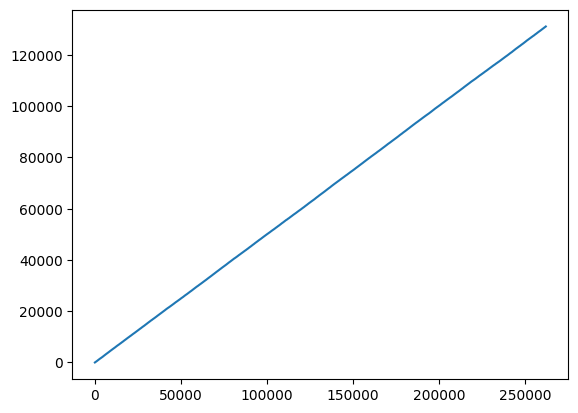

In [ ]:
# value_counts로 항목별 개수를 나타내본다 ( 분류의 경우 )  * 자주 쓰는 기능
print(train['target'].value_counts())
# 데이터의 모든 구간에서 누출(leak)없이 잘 섞여있는지도 확인해본다.
train['target'].cumsum().plot()

In [ ]:
# train 데이터 셋에 null 값이 있는지 확인해본다.
# train.isnull().sum().sum() 하면 null 값의 총 개수가 나온다.
print(train.isnull().sum().sum())
train.isnull().sum()

0


id                                      0
muggy-smalt-axolotl-pembus              0
dorky-peach-sheepdog-ordinal            0
slimy-seashell-cassowary-goose          0
snazzy-harlequin-chicken-distraction    0
                                       ..
muggy-turquoise-donkey-important        0
blurry-buff-hyena-entropy               0
bluesy-chocolate-kudu-fepid             0
gamy-white-monster-expert               0
target                                  0
Length: 258, dtype: int64

In [ ]:
# 범주형 변수, 수치형 변수가 각각 몇개 있는지 파악한다.
train.dtypes.value_counts()

float64    255
int64        2
object       1
dtype: int64

In [ ]:
# 각각 1개씩 있었던 열이 뭔지 확인해본다.
train.select_dtypes(include=['object','int64']).head()

,id,wheezy-copper-turtle-magic,target
0,707b395ecdcbb4dc2eabea00e4d1b179,99,0
1,5880c03c6582a7b42248668e56b4bdec,52,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,230,1
3,e350f17a357f12a1941f0837afb7eb8d,78,0
4,a8f910ea6075b6376af079055965ff68,497,0


In [ ]:
# *** id, target을 제외한 train의 열을 리스트로 만든다.
train_columns = [c for c in train.columns if c not in ['id','target']]
# 중복되지 않는 값의 개수를 세어본다.
train[train_columns].nunique()

muggy-smalt-axolotl-pembus              254322
dorky-peach-sheepdog-ordinal            254588
slimy-seashell-cassowary-goose          254356
snazzy-harlequin-chicken-distraction    254576
frumpy-smalt-mau-ordinal                254330
                                         ...  
jumpy-thistle-discus-sorted             254261
muggy-turquoise-donkey-important        254366
blurry-buff-hyena-entropy               254345
bluesy-chocolate-kudu-fepid             254329
gamy-white-monster-expert               254192
Length: 256, dtype: int64

In [ ]:
# 다른 특성보다 특별히 데이터(중복되지 않는 값의 개수)가 적은 열이 있는지도 확인해본다.
print(np.where(train[train_columns].nunique() < 50000))
# -> (array([146]),)

# 146번째 열이 뭘까?
print(train_columns[146]) # wheezy-copper-turtle-magic
print(train[train_columns].nunique()[146]) # 중복되지 않는 값의 개수가 512개이다.
print(train['wheezy-copper-turtle-magic'].value_counts().mean()) # 이 열의 평균은?

(array([146]),)
wheezy-copper-turtle-magic
512
512.0


In [ ]:
# 그렇다면 이 열의 데이터를 표를 만들어 살펴보자
# value에 해당하는 값이 counts 개만큼 있다는 뜻이다.
train['wheezy-copper-turtle-magic'].value_counts().rename_axis(
    'value').reset_index(name='counts')

,value,counts
0,51,570
1,489,556
2,298,554
3,135,554
4,245,553
...,...,...
507,277,476
508,215,475
509,108,472
510,42,471


In [ ]:
# descirbe로 데이터의 간단한 통계와 분포를 확인할 수 있다.
train_columns = [c for c in train.columns if c not in ['id','target',
                                                       'wheezy-copper-turtle-magic']]
# count를 제거하기 위해 T로 전치했다가 다시 T로 전치해서 표현.
describe = train[train_columns].describe().T.drop('count', axis=1)
cmap = sns.diverging_palette(5, 250, as_cmap=True)
describe.T.style.background_gradient(cmap, axis=1)

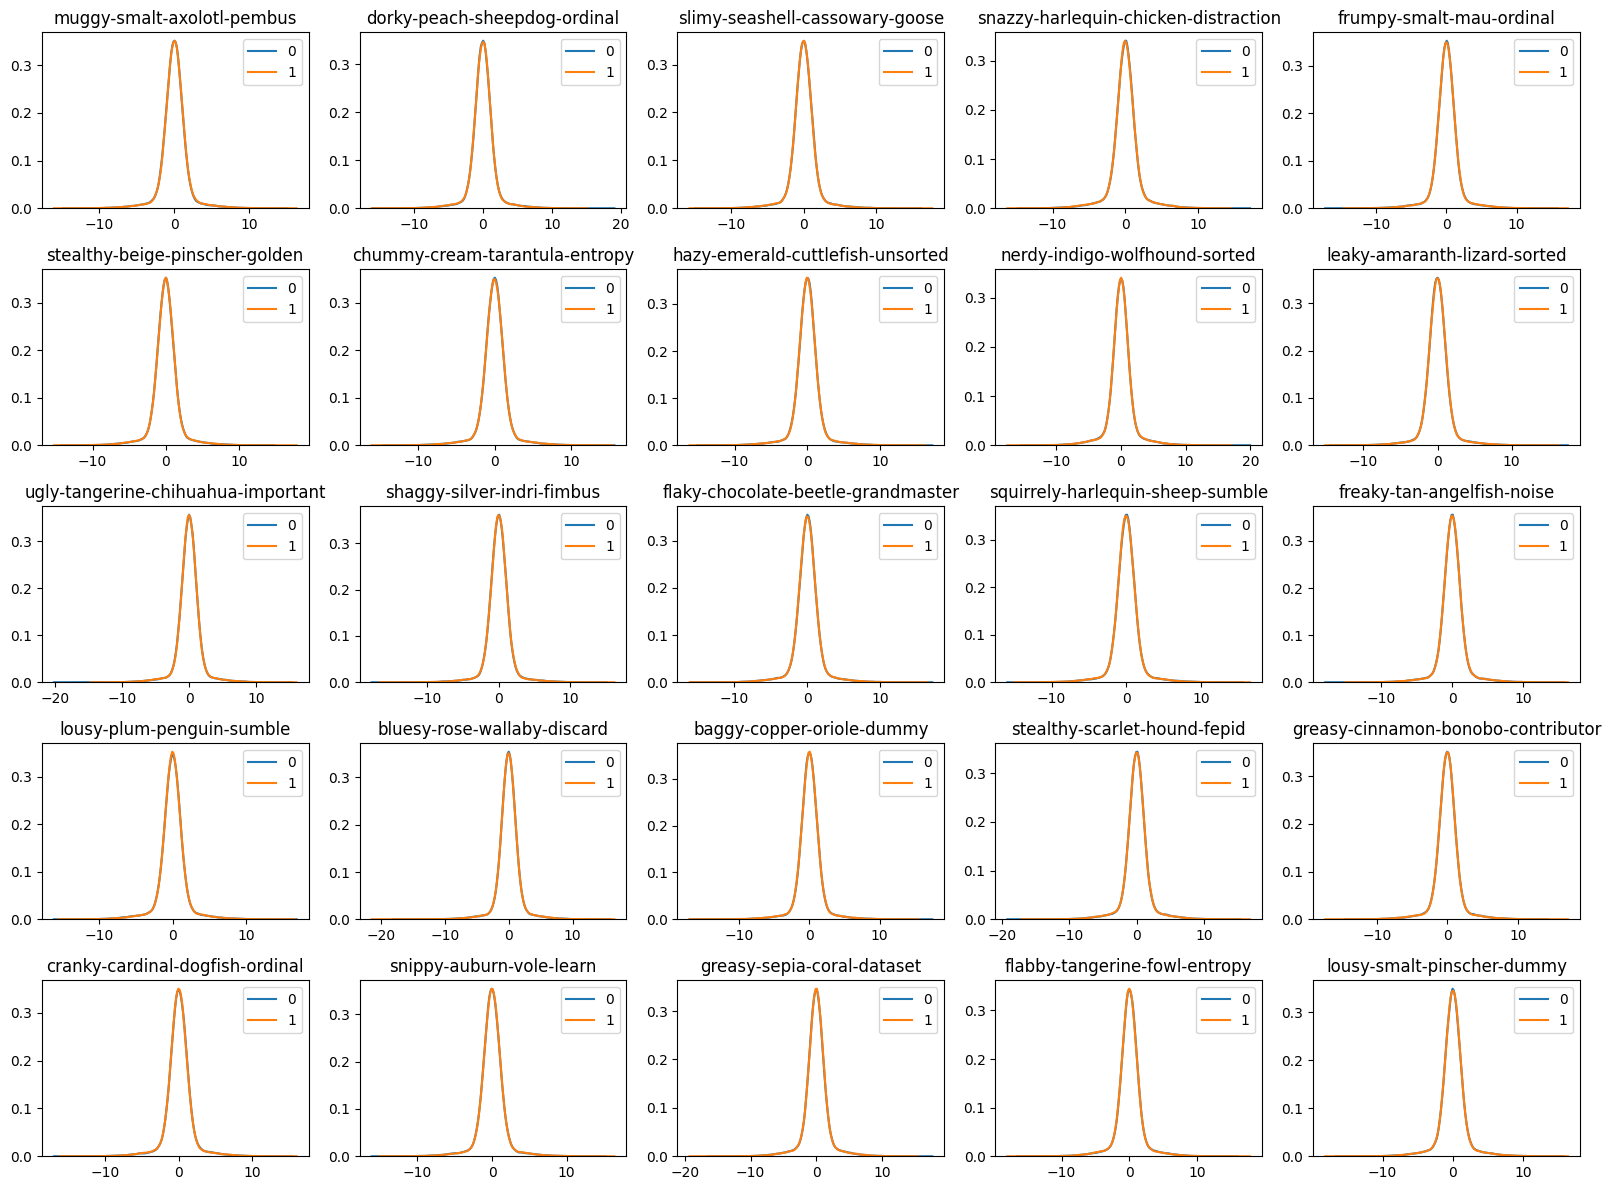

In [ ]:
#정답값에 따라 분포가 달라지는 특성이 있는지 확인해본다.
#위에서 살펴보았듯 데이터(특성)의 평균이 모두 거의 0이므로
#각 특성에 의한 정답 분포 또한 모두 중앙에 위치하는걸 볼 수 있다.
train_columns = [c for c in train.columns if c not in ['id','target']]
target_0_df = train.loc[train['target'] == 0]
target_1_df = train.loc[train['target'] == 1]

plt.figure(figsize = (16, 12))
for index ,name in enumerate(train_columns[:25]):
    plt.subplot(5, 5, index + 1)
    sns.kdeplot(target_0_df[name], label = 'target == 0')
    sns.kdeplot(target_1_df[name], label = 'target == 1')
    plt.title(name)
    plt.xlabel("")
    plt.ylabel("")
    plt.legend(["0", "1"])

plt.tight_layout()
plt.show()

```
타이타닉에서 가져온 예시, 다음과 같이 pairplot으로
여러개의 특성들의 상관관계를 산점도로 표현할 수 있다.
#3. 피처 선별
selected_feature_set = ['MedInc', 'AveRooms']
sub_train_data = train_data[selected_feature_set + ['MedPrice']] #새로운 데이터셋

X_train = sub_train_data.drop('MedPrice', axis=1)
X_test = X_test[selected_feature_set]

# 산점도와 함께 히스토그램으로 표현된 분포도
sns.pairplot(sub_train_data, plot_kws = {'alpha': 0.6})#alpha = 투명도
plt.show()
#처리해야할 이상치들이 보인다.
```

# **모델 생성**

In [ ]:
# 먼저 train 데이터에 target이 섞여있으니 이걸 분리해준다.
train_x = train.drop(['target'], axis=1)
train_y = train['target']
"""
데이터를 분리하기 전에 KernelPCA등을 수행할 수도 있고
GMM(Gaussian Mixture Model), 특성 생성 등을 수행하고
이들을 모두 합친 후 전처리(StandardScaler)를 수행하고
마지막으로 그 데이터를 훈련 데이터로 사용하면 좋다.
"""

In [ ]:
"""
스태킹을 통해 모델을 훈련했다.
stacking 모델로는
NuSVC 2개,
QuadraticDiscriminantAnalysis(QDA),SVC,KNeighborsClassifier,LogisticRegression
등 6개 모델을 스태킹하였고 Meta 모델로는 LGBM과 얕은 신경망을 활용했다.
하이퍼 파라미터 튜닝으로는 Hyperopt 라이브러리를 활용했다.
"""
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

base_models = [
    ('xgb1', XGBClassifier()),
    ('xgb2', XGBClassifier()),
    ('xgb3', XGBClassifier())
]

# 최종 모델 정의
final_model = LogisticRegression()

# StackingClassifier 생성
stacked_model = StackingClassifier(estimators=base_models,
                                   cv = 3,
                                   final_estimator=final_model)

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(train_x,
                                                      train_y,
                                                      test_size=0.2,
                                                      random_state=42)
# 스태킹 모델 학습
stacked_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
predictions = stacked_model.predict(X_valid)